# 파이썬으로 배우는 통계학 교과서
## 3.7. 추정

### 3.7.1. 분석 준비

In [2]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [3]:
# 데이터를 읽어들임
fish = pd.read_csv("3-7-1-fish_length.csv")["length"]
fish

0    4.352982
1    3.735304
2    5.944617
3    3.798326
4    4.087688
5    5.265985
6    3.272614
7    3.526691
8    4.150083
9    3.736104
Name: length, dtype: float64

### 3.7.2. 점추정

In [4]:
# 모평균의 점추정 = 표본평균
mu = np.mean(fish)
mu

4.187

In [5]:
# 모분산의 점추정 = 불편분산
sigma_2 = np.var(fish, ddof = 1)
sigma_2

0.680

### 3.7.7. 구간추정

In [6]:
# 자유도
df = len(fish) - 1
df

9

In [7]:
# 표준오차
sigma = np.std(fish, ddof = 1)
se = sigma / np.sqrt(len(fish))
se

0.261

In [8]:
# 신뢰구간
interval = stats.t.interval(confidence = 0.95, df = df, loc = mu, scale = se)
interval

(3.597, 4.777)

In [9]:
?stats.t.interval

Signature: stats.t.interval(confidence, *args, **kwds)
Docstring:
Confidence interval with equal areas around the median.

Parameters
----------
confidence : array_like of float
    Probability that an rv will be drawn from the returned range.
    Each value should be in the range [0, 1].
arg1, arg2, ... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information).
loc : array_like, optional
    location parameter, Default is 0.
scale : array_like, optional
    scale parameter, Default is 1.

Returns
-------
a, b : ndarray of float
    end-points of range that contain ``100 * alpha %`` of the rv's
    possible values.

Notes
-----
This is implemented as ``ppf([p_tail, 1-p_tail])``, where
``ppf`` is the inverse cumulative distribution function and
``p_tail = (1-confidence)/2``. Suppose ``[c, d]`` is the support of a
discrete distribution; then ``ppf([0, 1]) == (c-1, d)``. Therefore,
when ``confidence=1`` and the distributio

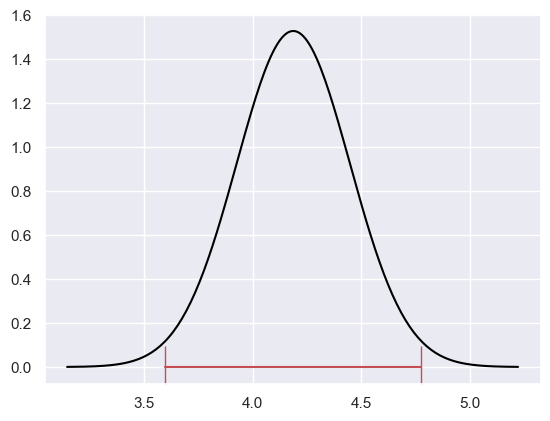

In [10]:
# 확률밀도함수와 신뢰구간 시각화
x_plot = np.arange(start = mu-4*se, stop = mu+4*se, step = 0.01)
plt.plot(x_plot, stats.norm.pdf(x = x_plot, loc = mu, scale = se), color = 'black')
plt.plot(interval, [0, 0], 'r|-', markersize = 30)
plt.show()

### 3.7.8. 신뢰구간을 구하는 방법 상세 설명

In [11]:
# 97.5% 지점, 변동폭이 10배
t_975 = stats.t.ppf(q = 0.975, df = df)
t_975

2.262

In [12]:
# 하측신뢰한계
lower = mu - t_975 * se
lower

3.597

In [13]:
# 상측신뢰한계
upper = mu + t_975 * se
upper

4.777

### 3.7.9. 신뢰구간의 폭을 결정하는 요소

In [14]:
# 표본표준편차를 10배 늘려서 95% 신뢰구간 계산
se2 = (sigma*10) / np.sqrt(len(fish))
interval2 = stats.t.interval(confidence = 0.95, df = df, loc = mu, scale = se2)
print(interval2)

(np.float64(-1.7132533524774756), np.float64(10.087332001486523))


In [15]:
# 샘플사이즈를 10배로 늘려서 95% 신뢰구간 계산
df2 = (len(fish)*10) - 1
se3 = sigma / np.sqrt(len(fish)*10)
stats.t.interval(confidence = 0.95, df = df2, loc = mu, scale = se3)

(4.023, 4.351)

In [16]:
# 95% 신뢰구간
stats.t.interval(confidence = 0.95, df = df, loc = mu, scale = se)

(3.597, 4.777)

In [17]:
# 99% 신뢰구간
stats.t.interval(confidence = 0.99, df = df, loc = mu, scale = se)

(3.339, 5.035)

### 3.7.10. 신뢰구간의 해석

In [18]:
# 신뢰구간이 모평균(4)를 포함하는지 값을 저장하는 변수를 준비
be_included_array = np.zeros(10000, dtype = "bool")
be_included_array

array([False, False, False, ..., False, False, False], shape=(10000,))

In [19]:
# 95% 신뢰구간을 구하는 시행을 20000번 반복
# 신뢰구간이 모평균(4)를 포함하면 True
np.random.seed(1)
norm_dist = stats.norm(loc = 4, scale = 0.8)
for i in range(0, 10000):
    sample = norm_dist.rvs(size = 10)
    df = len(sample) - 1
    mu = np.mean(sample)
    std = np.std(sample, ddof = 1)
    se = std / np.sqrt(len(sample))
    interval = stats.t.interval(0.95, df, mu, se)
    if(interval[0] <= 4 and interval[1] >= 4):
        be_included_array[i] = True

In [22]:
sum(be_included_array) / len(be_included_array)

0.944

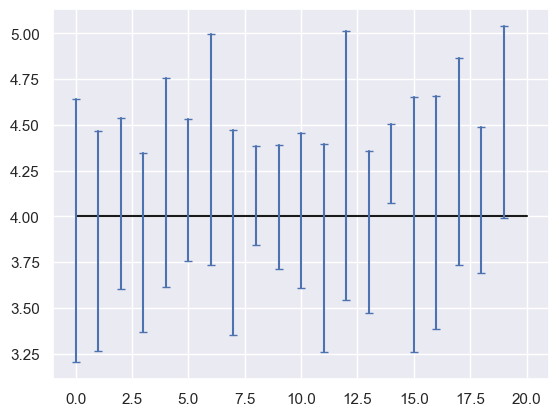

In [21]:
# 신뢰구간 시뮬레이션 시각화 (n_trial번 시행)
np.random.seed(1)
norm_dist = stats.norm(loc = 4, scale = 0.8)

n_trial = 20
plt.plot([0, n_trial], [4, 4], 'k-')
for i in range(0, n_trial):
    sample = norm_dist.rvs(size = 10)
    df = len(sample) - 1
    mu = np.mean(sample)
    std = np.std(sample, ddof = 1)
    se = std / np.sqrt(len(sample))
    interval = stats.t.interval(0.95, df, mu, se)    
    plt.plot([i,i], interval, 'b_-')
plt.show()    